In [ ]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("SBIBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13
1,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14
2,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13
3,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14
4,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14


In [ ]:
Close_list = all_data['Close'].tolist()
total=len(Close_list);


In [ ]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
D9=[]
D10=[]
D11=[]
D12=[]
D13=[]
D14=[]
D15=[]
D16=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
for i in range(0,total):
  D1.append(Close_list[j])
  D2.append(Close_list[j+1])
  D3.append(Close_list[j+2])
  D4.append(Close_list[j+3])
  D5.append(Close_list[j+4])
  D6.append(Close_list[j+5])
  D7.append(Close_list[j+6])
  D8.append(Close_list[j+7])
  D9.append(Close_list[j+8])
  D10.append(Close_list[j+9])
  D11.append(Close_list[j+10])
  D12.append(Close_list[j+11])
  D13.append(Close_list[j+12])
  D14.append(Close_list[j+13])
  D15.append(Close_list[j+14])
  D16.append(Close_list[j+15])
  diff=Close_list[j+15]-Close_list[j+14]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+15]
  PERCDIFF.append(percdiff)
  if(percdiff>0.7):
    TARGET.append('pos')
  elif(percdiff<-0.7):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-15):
    break

In [ ]:

df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(D9)
df10=pd.DataFrame(D10)
df11=pd.DataFrame(D11)
df12=pd.DataFrame(D12)
df13=pd.DataFrame(D13)
df14=pd.DataFrame(D14)
df15=pd.DataFrame(D15)
df16=pd.DataFrame(D16)
df17=pd.DataFrame(DIFF)
df18=pd.DataFrame(PERCDIFF)
df19=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['D9']=df9
df['D10']=df10
df['D11']=df11
df['D12']=df12
df['D13']=df13
df['D14']=df14
df['D15']=df15
df['D16']=df16
df['DIFF']=df17
df['PERCDIFF']=df18
df['TARGET']=df19
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,DIFF,PERCDIFF,TARGET
0,243.65,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,-9.15,-4.007884,neg
1,259.10,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,-3.45,-1.534356,neg
2,248.45,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,5.30,2.302846,pos
3,261.00,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,18.35,7.384306,pos
4,273.30,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,-3.80,-1.552922,neg
5,269.50,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,246.50,1.80,0.730223,pos
6,247.95,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,246.50,247.50,1.00,0.404040,neu
7,244.75,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,246.50,247.50,258.80,11.30,4.366306,pos
8,244.50,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,246.50,247.50,258.80,255.90,-2.90,-1.133255,neg
9,239.20,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,248.50,244.70,246.50,247.50,258.80,255.90,247.40,-8.50,-3.435732,neg


In [ ]:
features = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14']
df1=df[features]
df1['TARGET']=df['TARGET']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,TARGET
0,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,neg
1,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,neg
2,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,pos
3,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,pos
4,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,neg


In [ ]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df1['TARGET']=='pos','1',(np.where(df['TARGET']=='neg','-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,-1
1,-1
2,1
3,1
4,-1


TARGET
-1    1883
0     1700
1     1979
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

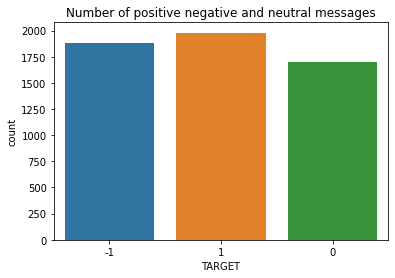

In [ ]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [ ]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df1.columns:
  if df1[col].dtype=='object':
    df1[col]=pd.Categorical(df1[col]).codes
df1.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,TARGET
0,243.65,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,0
1,259.10,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,0
2,248.45,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,2
3,261.00,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,2
4,273.30,269.50,247.95,244.75,244.50,239.20,235.90,236.45,243.95,237.70,237.45,228.30,224.85,230.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,180.40,180.60,184.30,187.80,192.50,198.60,203.80,199.30,202.05,205.80,209.00,208.85,220.20,223.00,1
96,180.60,184.30,187.80,192.50,198.60,203.80,199.30,202.05,205.80,209.00,208.85,220.20,223.00,218.20,2
97,184.30,187.80,192.50,198.60,203.80,199.30,202.05,205.80,209.00,208.85,220.20,223.00,218.20,217.75,2
98,187.80,192.50,198.60,203.80,199.30,202.05,205.80,209.00,208.85,220.20,223.00,218.20,217.75,220.70,2


In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,0.030521,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744
1,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670
2,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937
3,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937,0.024907
4,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937,0.024907,0.026489


In [ ]:
x=feature_transform
x.head()
y=df1['TARGET']
y.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,0.030521,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744
1,0.035135,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670
2,0.031955,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937
3,0.035703,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937,0.024907
4,0.039376,0.038241,0.031805,0.030850,0.030775,0.029192,0.028207,0.028371,0.030611,0.028744,0.028670,0.025937,0.024907,0.026489


0    0
1    0
2    2
3    2
4    0
Name: TARGET, dtype: int8

In [ ]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(3893, 14)

(1669, 14)

(3893, 14)

(3893,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

#CREATE DECISION TREE CLASSIFIER OBJECT
decisiontree1=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=4,class_weight=None)
#TRAIN MODEL
model=decisiontree1.fit(train_x,train_y)
model
classes=decisiontree1.predict(test_x)

DecisionTreeClassifier(max_depth=4, random_state=0)

# **ACCURACY SCORE-Decision Tree Classifier**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.3211503894547633


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.31      0.44      0.37       528
           1       0.00      0.00      0.00       534
           2       0.33      0.50      0.40       607

    accuracy                           0.32      1669
   macro avg       0.21      0.31      0.25      1669
weighted avg       0.22      0.32      0.26      1669



CONFUSION MATRIX


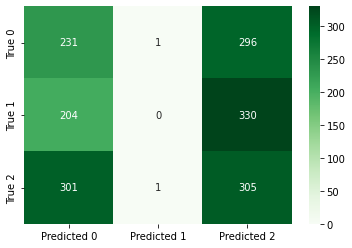

In [ ]:

#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(decisiontree1, param_dist, cv=5)

In [ ]:
# Fit it to the data
tree_cv.fit(train_x,train_y)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
classes=tree_cv.predict(test_x)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f683725ee90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6834b47f90>})

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8}
Best score is 0.3560233111463843


# **ACCURACY SCORE-Decision Tree Classifier using RandomizedSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.3439185140802876


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.31      0.39      0.34       528
           1       0.36      0.30      0.33       534
           2       0.37      0.35      0.36       607

    accuracy                           0.34      1669
   macro avg       0.35      0.34      0.34      1669
weighted avg       0.35      0.34      0.34      1669



CONFUSION MATRIX


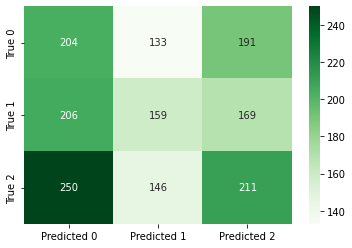

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
my_max_depth=[20,30,40,50,None]
my_criterion=['gini','entropy']
my_min_samples_split=[2,100,20,50,100]
#BUILDING THE MODEL
mytreeone=DecisionTreeClassifier()
#CROSS VALIDATION TELLS HOW A MODEL PERFORMS ON A DATASET USING MULTIPLE SAMPLES OF TRAIN DATA
grid=GridSearchCV(estimator=mytreeone,cv=3,param_grid=dict(max_depth=my_max_depth,criterion=my_criterion,min_samples_split=my_min_samples_split))
grid.fit(train_x,train_y)
classes=grid.predict(test_x)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40, 50, None],
                         'min_samples_split': [2, 100, 20, 50, 100]})

# **ACCURACY SCORE-Decision Tree Classifier using GridSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.34092270820850806


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.31      0.32      0.32       528
           1       0.34      0.33      0.34       534
           2       0.36      0.37      0.37       607

    accuracy                           0.34      1669
   macro avg       0.34      0.34      0.34      1669
weighted avg       0.34      0.34      0.34      1669



CONFUSION MATRIX


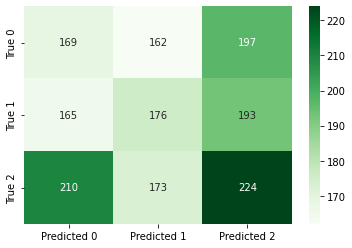

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
n_estimators=[100,200,300,500]
criterion=['gini','entropy']
min_samples_split=[5,10,20,25,50]
max_depth=[40,45,60,75,None]

In [ ]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=-1)
rf_g.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [40, 45, 60, 75, None],
                                        'min_samples_split': [5, 10, 20, 25,
                                                              50],
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=2)

In [ ]:
#PREDICT USING THE TRAINED MODEL
classes=rf_g.predict(test_x)

# **ACCURACY SCORE-RandomForestClassifier using RandomizedSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.732174955062912


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       528
           1       0.75      0.61      0.67       534
           2       0.72      0.82      0.77       607

    accuracy                           0.73      1669
   macro avg       0.73      0.73      0.73      1669
weighted avg       0.73      0.73      0.73      1669



CONFUSION MATRIX


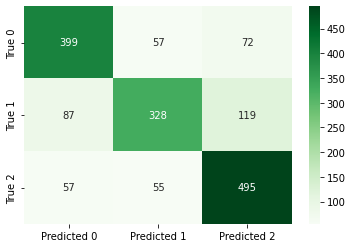

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [1]:
!jupyter nbconvert SBIpercdiff_0_7D1D14_SMP_DT_RF.ipynb

[NbConvertApp] Converting notebook SBIpercdiff_0_7D1D14_SMP_DT_RF.ipynb to html
[NbConvertApp] Writing 447546 bytes to SBIpercdiff_0_7D1D14_SMP_DT_RF.html
